In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from src.data.make_dataset import *
from src.data.modal_data import *

In [3]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')
data_folder

location = 'nw2'
turbine = 'c02'

In [4]:
turbine_data = get_turbine_data(data_folder, location, turbine)
mpe_ss_data = get_mpe_data(turbine_data, 'SS', location, turbine)

c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data\raw\nw2\nw2c02.parquet


In [5]:
from src.data.harmonics import *
harmonics_data = harmonics(turbine_data['mean_NW2_C02_rpm'], [1,3,6, 9])

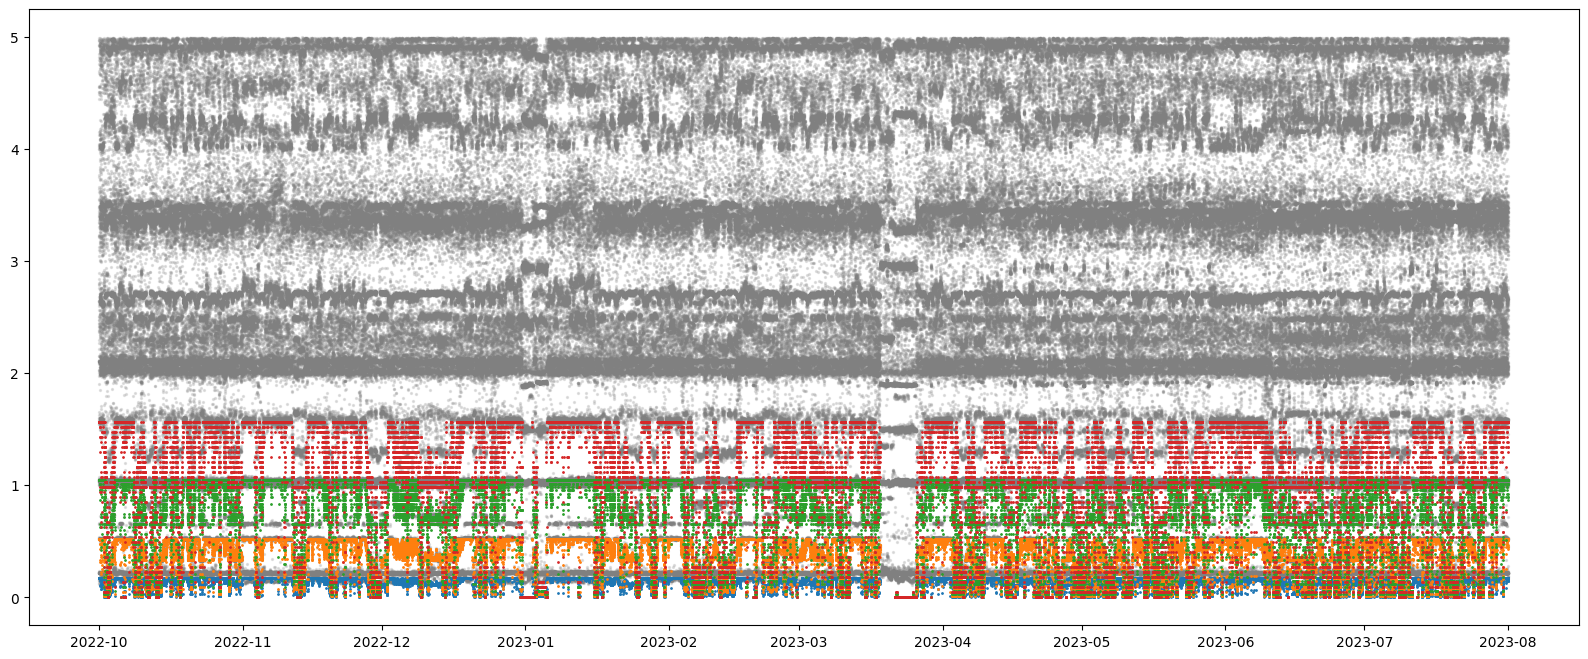

In [6]:
plt.figure(figsize=(20,8))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=0.2, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=1, label=harmonic, alpha=1.0)
plt.show()
plt.close()

In [7]:
import matplotlib
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Users\Max\AppData\Local\Temp\ipykernel_34300\1715195689.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


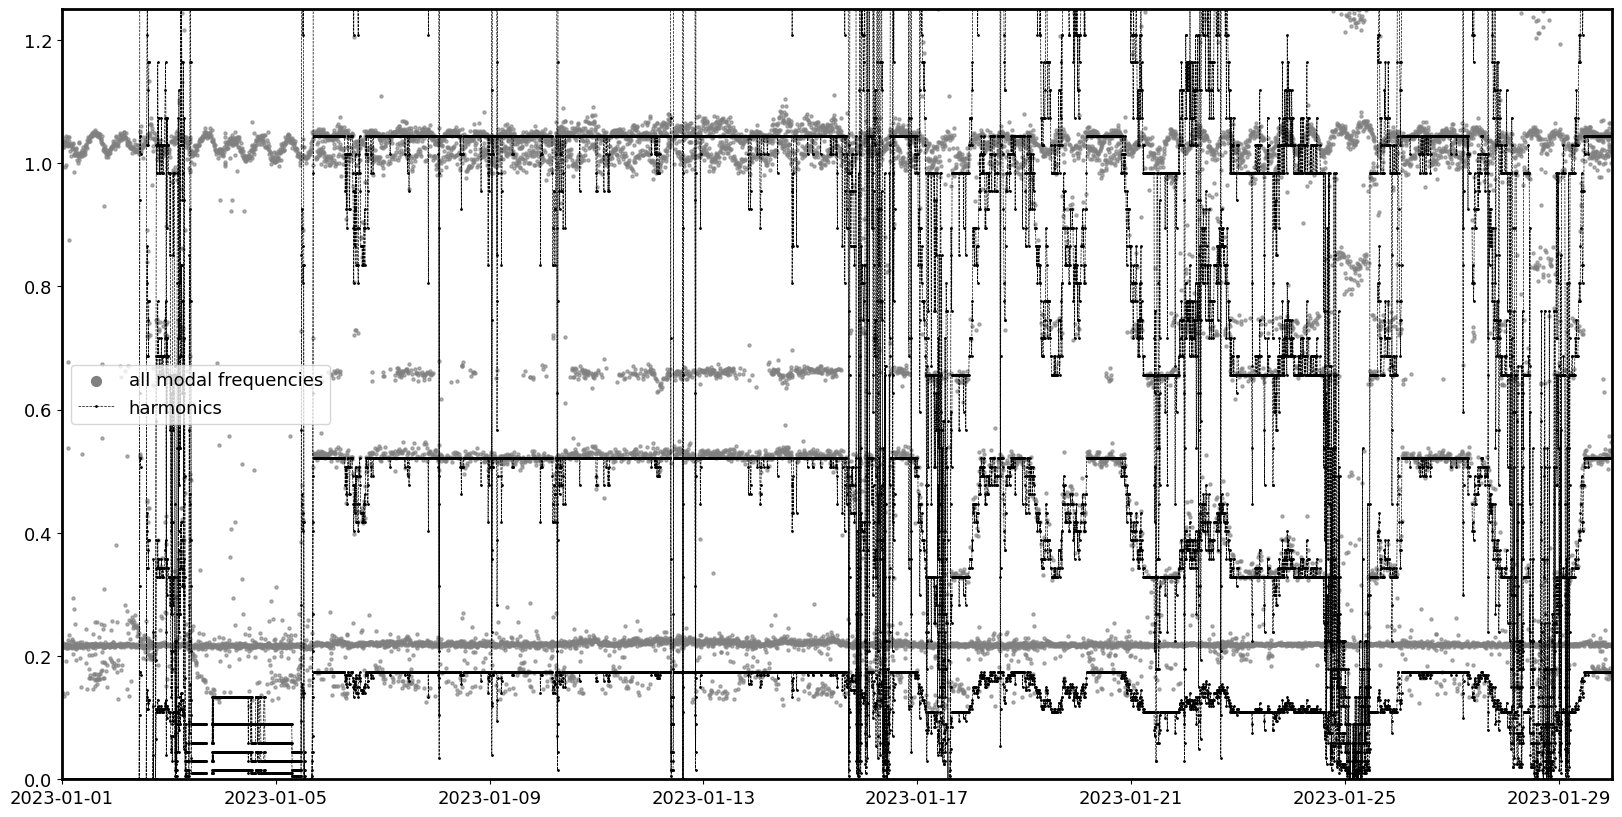

In [15]:
plt.figure(figsize=(20,10))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=5, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic], alpha=1.0, color='k', marker='o', markersize=1, linewidth=0.5, linestyle='--')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0, 1.25)
legend = plt.legend(loc='center left', labels=['all modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    try:
        handles.set_sizes([50])
        handles.set_alpha(1.0)
    except:
        pass
    

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_34300\3815147060.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


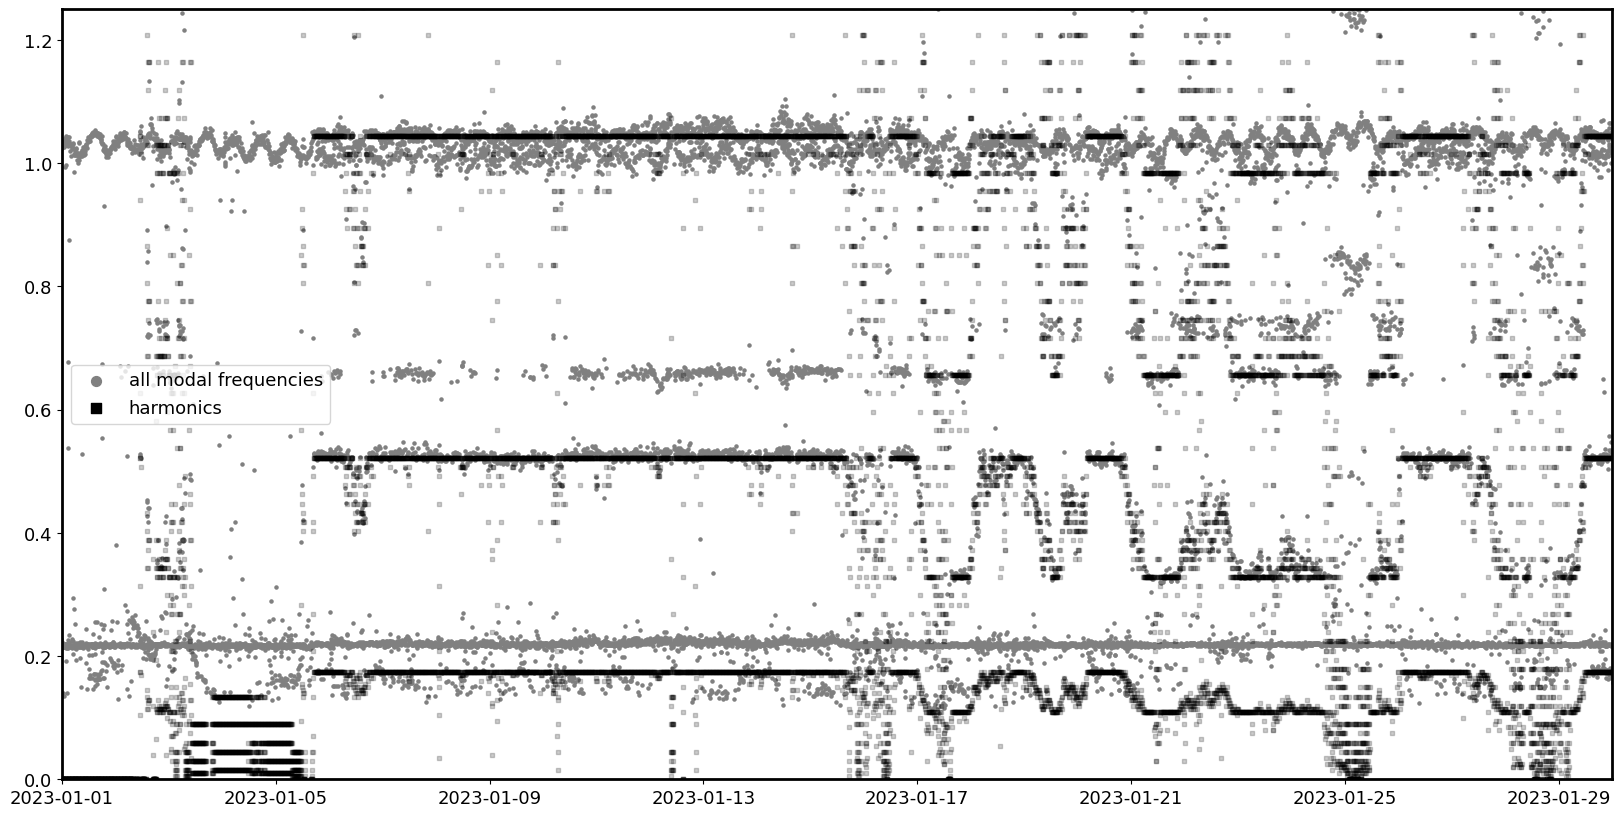

In [17]:
plt.figure(figsize=(20,10))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=5, alpha=1.0, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=2, alpha=0.2, color='k', marker = 's')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0, 1.25)
legend = plt.legend(loc='center left', labels=['all modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_34300\359845943.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


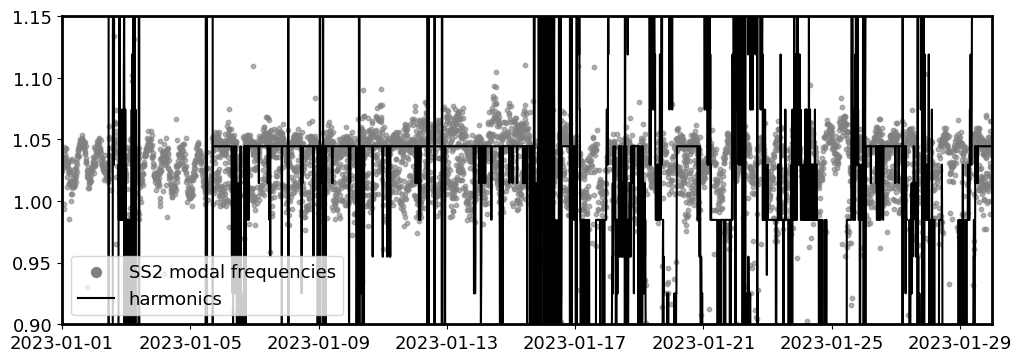

In [10]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.plot(harmonics_data.index, harmonics_data[harmonic],alpha=1.0, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    try:
        handles.set_sizes([50])
    except:
        pass
    handles.set_alpha(1.0)

plt.show()
plt.close()

KeyboardInterrupt: 

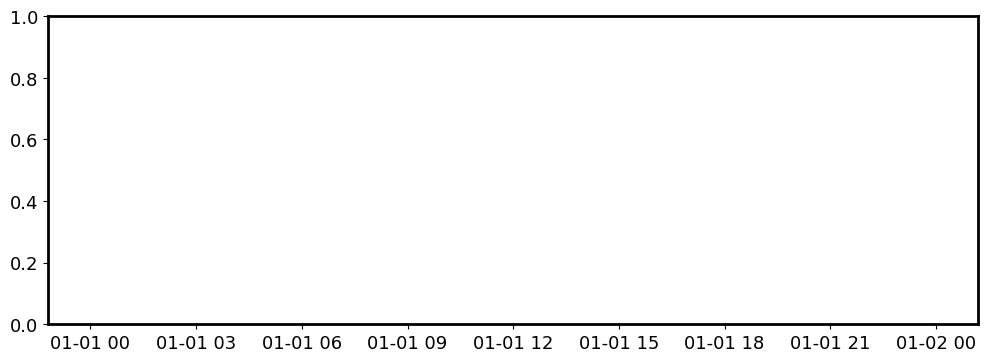

In [11]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.3, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.2, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.19, 0.25)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

In [ ]:
rpm_split = 6
low_rpm_timestamps = turbine_data[turbine_data['mean_NW2_C02_rpm'] < rpm_split].index
mpe_ss_data_lowrpm = mpe_ss_data[mpe_ss_data.index.isin(low_rpm_timestamps)]

C:\Users\Max\AppData\Local\Temp\ipykernel_14140\610727200.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


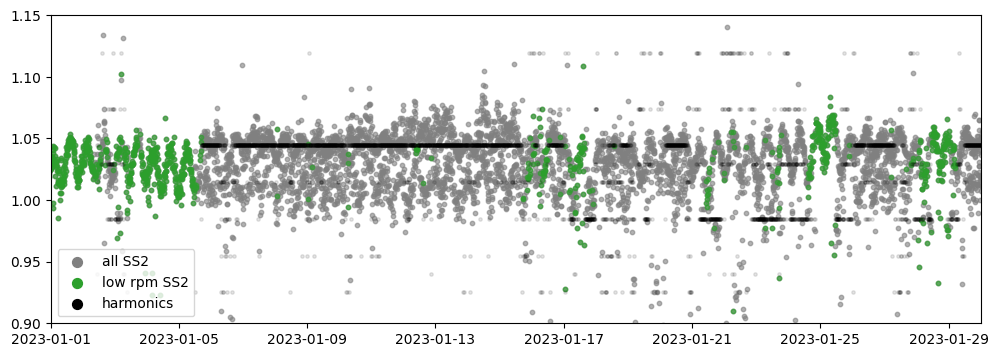

In [ ]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'low rpm SS2', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()